# Generating Data - Lab

## Introduction

In this lab, we shall practice some of the data generation techniques that we saw in earlier lesson to generate datasets for regression and classification purposes. We shall run a couple of simple simulations to help us generate different dataset by controlling noise and variance parameters in the data generation process. We shall look at the statistical indicators and visual output to see how these parameters affect the accuracy of an algorithm. 

## Objectives
You will be able to:

- Generate datasets for classification problems
- Generate datasets for regression problems

## Task 1

Create a function `reg_simulation()` to run a regression simulation creating a number of datasets with the `make_regression()` data generation function. Perform following tasks:

* Create `reg_simulation()` with n (noise) and random state input parameters
    * Make a regression dataset (X,y) with 100 samples using a given noise value and random state
    * Plot the data as a scatter plot 
    * Calculate and plot a regression line on the plot and calculate R2 (you can do this in statsmodels or sklearn)
    * Label the plot with the noise value and the calculated r-squared
    
* Pass a fixed random state and values from `[10, 25, 40, 50, 100, 200]` as noise values iteratively to the function above. 
* Inspect and comment on the output.

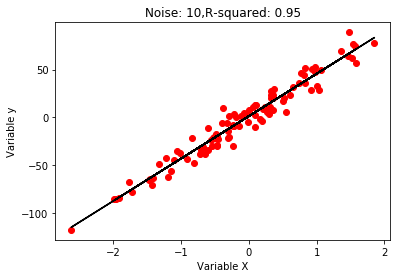

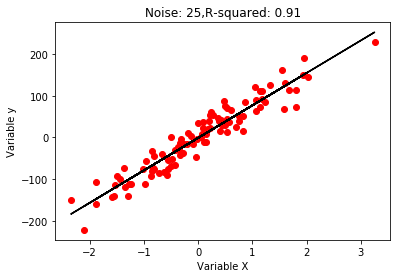

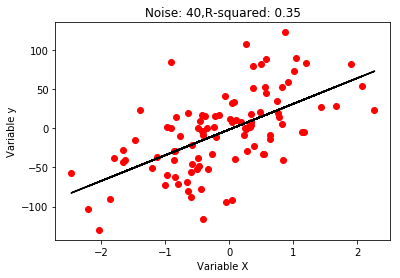

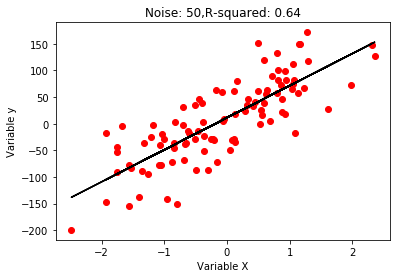

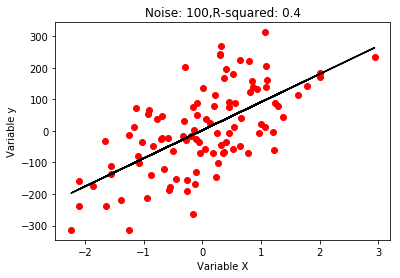

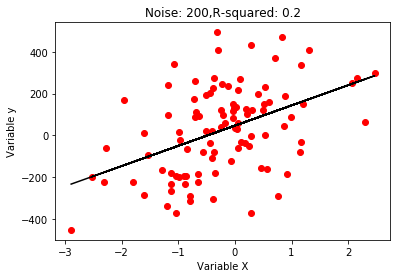

In [8]:
# import necessary libraries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def reg_simulation(n, random_state):
    
    # Generate X and y
    X,y=make_regression(n_samples=100, n_features=1, noise=n,random_state=random_state)

    # Use X,y to draw a scatter plot
    plt.scatter(X,y,color='red',label='Data')
    # Fit a linear regression model to X , y and calculate r2
    model = LinearRegression().fit(X,y)
    y_hat=model.predict(X)
    plt.plot(X,y_hat,color='black',label="Model")
    # label and plot the regression line 
    plt.title(f"Noise: {n},R-squared: {round(model.score(X,y),2)}")
    plt.xlabel("Variable X")
    plt.ylabel("Variable y")
    plt.show()
              


random_state = np.random.RandomState(42)

for n in [10, 25, 40, 50, 100, 200]:
    reg_simulation(n, random_state)

In [ ]:
# You comments here 
# As the noise increases, the r squared goes down, which makes sense.  If the noise was 0, the data would be perfectly linear
# and r squared would be 1.

## Task 2

As above, we shall now try to tackle a classification problem using a Linear SVM classifier. This will be covered in more detail in an upcoming section, so here we'll give you the necessary code for fitting the classifier and calculating the decision boundary. The idea here is to keep the code simple and focus on understanding the effect the generated data has on the classifier's performance. 

For this you need to perform the following tasks 
* Create the function classification_simulation with random state and std (standard deviation) as input parameters
    * Use `make_blobs()` to create a classification dataset with 100 samples, 2 features/centers and use provided random state and standard deviation values for placing data
    * Plot the values on a scatter plot, while color coding both classes
    * Use unsupervised SVM to classify the data (given)
    * Calculate the decision boundary from SVM output (given)
    * Plot the decision boundary on a scatter plot
   
* Pass a fixed random state and standard deviation (std) values from [0, 0.5, 1, 1.5, 2, 2.5, 3] iteratively to the function above.

* Inspect and comment on the output.


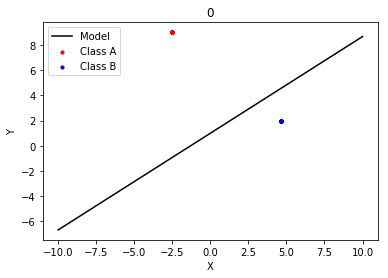

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


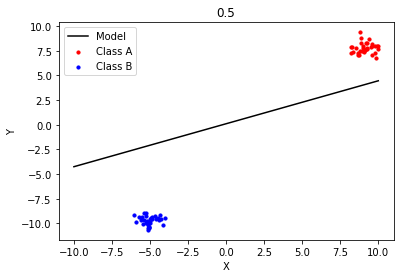

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


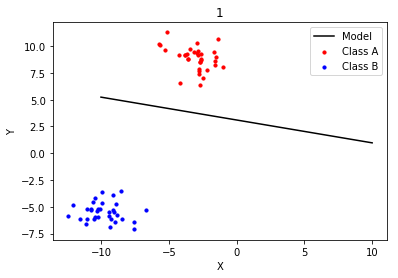

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


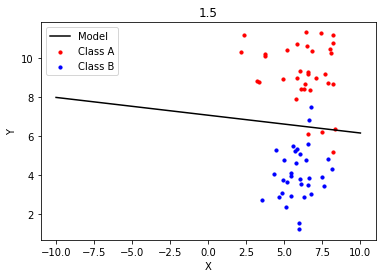

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


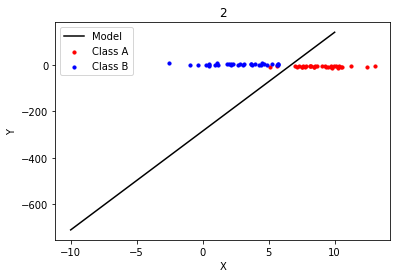

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


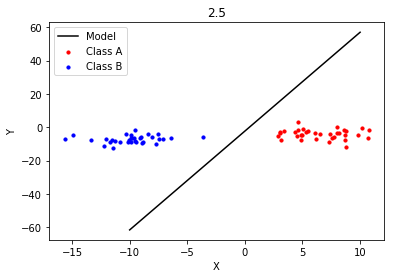

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


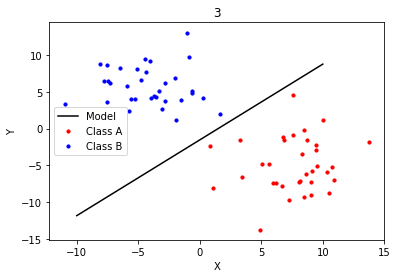

In [13]:
# import necessary ibraries

from sklearn.svm import LinearSVC
from sklearn.datasets.samples_generator import make_blobs

def classification_simulation(random_state, std):

    # Create X, y (2 classes) and make a color coded scatter plot
    X, y = make_blobs(n_samples=100, cluster_std=std, n_features=2,random_state=random_state)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Class A")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Class B")
    
    # Fit an SVM model
    clf = LinearSVC().fit(X, y)

    # get the Separating hyperplane i.e. the decision boundary
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-10, 10)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the decision line with xx and yy calculated above
    plt.plot(xx, yy, 'k-', color="black", label="Model")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title(std)
    plt.show()

    # label and show the plot
    plt.show()

random_state = np.random.RandomState(42)

for std in [0,0.5, 1, 1.5, 2, 2.5, 3]:
    classification_simulation(random_state, std)

In [14]:
# You comments here 
# I don't really know what I"m looking at here.  I know that the dots for each cluster spread out as the standard
# deviation increases.  The black line is a boundary between the two clusters.  The slope of the line does not appear
# to be affected by the std, but rather the center of each cluster.

## Summary 

In this lesson, we learned how to generate random datasets in classification and regression contexts. we ran two simulations for this and fitted simple models to view the effect of random data parameters including noise level and std on the performance of parameters, visually as well as objectively. These skills will come in handy while testing model performance and robustness in future. 